In [1]:
from Squidiff.VAE import VAE

In [12]:
import anndata as ad 

In [2]:
import toml
hepg2 = toml.load('/work/home/cryoem666/xyf/temp/pycharm/Squidiff/data/replogle/hepg2.toml')
jurkat = toml.load('/work/home/cryoem666/xyf/temp/pycharm/Squidiff/data/replogle/jurkat.toml')
k562 = toml.load('/work/home/cryoem666/xyf/temp/pycharm/Squidiff/data/replogle/k562.toml')
rpe1 = toml.load('/work/home/cryoem666/xyf/temp/pycharm/Squidiff/data/replogle/rpe1.toml')


In [13]:
state = ad.read_h5ad('/work/home/cryoem666/xyf/temp/pycharm/Squidiff/data/replogle/replogle.h5ad')
state.obs

,gem_group,gene,gene_id,transcript,gene_transcript,sgID_AB,mitopercent,UMI_count,z_gemgroup_UMI,cell_line
cell_barcode,,,,,,,,,,
AAACCCAAGAATAGTC-3,3,KIAA1143,ENSG00000163807,P1P2,4360_KIAA1143_P1P2_ENSG00000163807,KIAA1143_+_44803075.23-P1P2|KIAA1143_+_4480308...,0.114029,11234.0,-0.611091,hepg2
AAACCCAAGAGGTATT-55,55,SEPHS2,ENSG00000179918,P1P2,7779_SEPHS2_P1P2_ENSG00000179918,SEPHS2_-_30457178.23-P1P2|SEPHS2_+_30457164.23...,0.165242,45146.0,0.208833,hepg2
AAACCCAAGAGTGACC-39,39,POLR2H,ENSG00000163882,P1P2,6549_POLR2H_P1P2_ENSG00000163882,POLR2H_+_184081227.23-P1P2|POLR2H_-_184081237....,0.162209,20190.0,-0.025114,hepg2
AAACCCAAGATGGCAC-43,43,TFAM,ENSG00000108064,P1P2,8832_TFAM_P1P2_ENSG00000108064,TFAM_+_60145205.23-P1P2|TFAM_-_60145223.23-P1P2,0.071596,23912.0,2.079665,hepg2
AAACCCAAGCAACAAT-16,16,TMEM214,ENSG00000119777,P1P2,9042_TMEM214_P1P2_ENSG00000119777,TMEM214_-_27255873.23-P1P2|TMEM214_-_27255853....,0.109515,8282.0,-0.214576,hepg2
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCTGATGGT-14,14,SLC1A5,ENSG00000105281,P1,7976_SLC1A5_P1_ENSG00000105281,SLC1A5_+_47291839.23-P1|SLC1A5_+_47291829.23-P1,0.062634,15423.0,0.347911,rpe1
TTTGTTGTCTGCACCT-44,44,MAX,ENSG00000125952,P1P2,4871_MAX_P1P2_ENSG00000125952,MAX_+_65569008.23-P1P2|MAX_-_65568906.23-P1P2,0.079629,22228.0,0.767826,rpe1
TTTGTTGTCTGGGCAC-32,32,ATP6V0C,ENSG00000185883,P1P2,675_ATP6V0C_P1P2_ENSG00000185883,ATP6V0C_+_2564168.23-P1P2|ATP6V0C_-_2563995.23...,0.049527,12377.0,-0.004215,rpe1


In [8]:
hepg2_gene = hepg2['fewshot']['replogle_proper.hepg2']['val'] + hepg2['fewshot']['replogle_proper.hepg2']['test']
jurkat_gene = jurkat['fewshot']['replogle_proper.jurkat']['val'] + jurkat['fewshot']['replogle_proper.jurkat']['test']
k562_gene = k562['fewshot']['replogle_proper.k562']['val'] + k562['fewshot']['replogle_proper.k562']['test']
rpe1_gene = rpe1['fewshot']['replogle_proper.rpe1']['val'] + rpe1['fewshot']['replogle_proper.rpe1']['test']

In [16]:
hepg2_train = state[~((state.obs['cell_line']=='hepg2')&(state.obs['gene'].isin(hepg2_gene)))].copy()
rpe1_train = state[~((state.obs['cell_line']=='rpe1')&(state.obs['gene'].isin(rpe1_gene)))].copy()
jurkat_train = state[~((state.obs['cell_line']=='jurkat')&(state.obs['gene'].isin(jurkat_gene)))].copy()
k562_train = state[~((state.obs['cell_line']=='k562')&(state.obs['gene'].isin(k562_gene)))].copy()

In [17]:
hepg2_train.write_h5ad('/work/home/cryoem666/xyf/temp/pycharm/Squidiff/data/replogle/hepg2_train_fewshot.h5ad')
rpe1_train.write_h5ad('/work/home/cryoem666/xyf/temp/pycharm/Squidiff/data/replogle/rpe1_train_fewshot.h5ad')
jurkat_train.write_h5ad('/work/home/cryoem666/xyf/temp/pycharm/Squidiff/data/replogle/jurkat_train_fewshot.h5ad')
k562_train.write_h5ad('/work/home/cryoem666/xyf/temp/pycharm/Squidiff/data/replogle/k562_train_fewshot.h5ad')

In [15]:
len(hepg2_train)

611710

In [2]:
import torch 
import anndata as ad 
import numpy as np
import pandas as pd
import scanpy as sc
total_file = '/work/home/cryoem666/xyf/temp/pycharm/Squidiff/data/replogle/replogle.h5ad'
adata = ad.read_h5ad(total_file)

In [4]:
autoencoder = VAE(
    num_genes=2000,
    device='cuda',
    seed=0,
    loss_ae='mse',
    hidden_dim=128,
    decoder_activation='ReLU',
)
import torch
vae_path = "/work/home/cryoem666/xyf/temp/pycharm/scDiffusion/output/checkpoint/AE/my_VAE/model_seed=0_step=199999.pt"
autoencoder.load_state_dict(torch.load(vae_path))


<All keys matched successfully>

选择的组: ['non-targeting', 'CACTIN', 'RIOK2', 'STAT5A', 'COX7C', 'C18orf21']
CACTIN 抽取细胞数: 39
RIOK2 抽取细胞数: 223
STAT5A 抽取细胞数: 170
COX7C 抽取细胞数: 468
C18orf21 抽取细胞数: 99
子集细胞数: 1999 基因数: 6642
平均最近距离（行: 源组 -> 列: 目标组）
               non-targeting     CACTIN      RIOK2     STAT5A      COX7C  \
non-targeting      21.038506  27.696007  24.863356  24.670105  21.983492   
CACTIN             22.679111  23.114946  26.693865  26.217005  22.901493   
RIOK2              22.115047  28.628212  22.851664  23.077721  22.801907   
STAT5A             19.873709  26.603279  20.633680  20.096556  20.357574   
COX7C              21.342766  27.750702  25.025806  24.751902  22.014263   
C18orf21           24.026491  28.968256  27.500269  27.838305  24.935637   

                C18orf21  
non-targeting  26.388338  
CACTIN         24.572451  
RIOK2          27.477600  
STAT5A         26.578354  
COX7C          26.833500  
C18orf21       26.493967  
组中心间距离矩阵：
               non-targeting     CACTIN      RIOK2     STAT5

/work/home/cryoem666/miniconda3/envs/my_state/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Figure size 600x500 with 0 Axes>

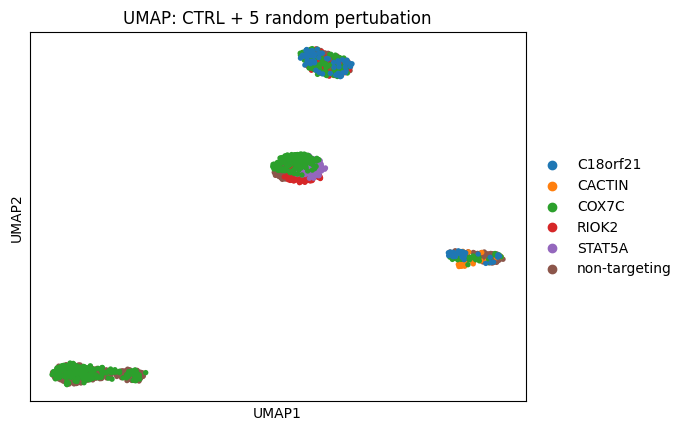

In [8]:
# ...existing code...
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import sparse
import faiss

# 随机种子（保证可复现）
seed = 0
rng = np.random.RandomState(seed)

group_col = 'gene'   # obs 中分组列名（根据你的数据调整）
ctrl_name = 'non-targeting'   # 控制组名称，确认存在于 obs[group_col]

# 1) 选择 CTRL + 随机 5 个扰动
all_groups = adata.obs[group_col].unique().tolist()
if ctrl_name not in all_groups:
    raise KeyError(f"{ctrl_name} 不在 obs['{group_col}'] 中，请确认名称")

other = [g for g in all_groups if g != ctrl_name]
if len(other) < 5:
    raise ValueError("扰动类别不足 5 个，请调整要求或检查数据")

chosen = rng.choice(other, size=5, replace=False).tolist()
sel_groups = [ctrl_name] + chosen
#sel_groups = ['CTRL', 'HMGCS1', 'APOE', 'FTL', 'RPS25', 'ATM']
print("选择的组:", sel_groups)
# control抽 1000个细胞 其他每个扰动抽最多500个
import random 
control_cells = random.sample(list(adata.obs_names[adata.obs[group_col]==ctrl_name]),1000)
perturb_cells = []
for g in chosen:
    cells = list(adata.obs_names[adata.obs[group_col]==g])
    if len(cells) > 500:
        sampled = random.sample(cells,500)
    else:
        sampled = cells
    print(g, "抽取细胞数:", len(sampled))
    perturb_cells.extend(sampled)
selected_cells = control_cells + perturb_cells
adata_sub = adata[selected_cells, :].copy()
print("子集细胞数:", adata_sub.n_obs, "基因数:", adata_sub.n_vars)

adata_sub = adata_sub[:, adata_sub.var['highly_variable']].copy()

adata_sub.obsm['VAE_latent'] = autoencoder(torch.tensor(adata_sub.X, dtype=torch.float32).to(autoencoder.device), return_latent=True).cpu().detach().numpy()
# PCA
#n_pcs = 50
#sc.tl.pca(adata_sub, n_comps=n_pcs, svd_solver='arpack', random_state=seed)
#X_hvg = adata_sub.obsm['X_hvg'].astype('float32')   # cells x n_pcs
#X_hvg = adata_sub.X.toarray().astype('float32')
# 3) FAISS：确保已安装 faiss
try:
    import faiss
except Exception as e:
    raise ImportError("需要安装 faiss（例如 pip install faiss-cpu）。具体命令：pip install faiss-cpu") from e
d = 2000
X_hvg = adata_sub.X
# 为每个目标组构建 faiss 索引，计算从每个源组到每个目标组的平均最近距离
groups = adata_sub.obs[group_col].values
unique_groups = sel_groups  # 保持顺序为上面选取的顺序
avg_dist = pd.DataFrame(index=unique_groups, columns=unique_groups, dtype=float)

for g_target in unique_groups:
    mask_t = (groups == g_target)
    X_target = X_hvg[mask_t]
    # 若目标组只有一个点，faiss 仍然可工作（k=1）
    index = faiss.IndexFlatL2(d)
    index.add(X_target)   # 向量以 float32 添加
    for g_source in unique_groups:
        mask_s = (groups == g_source)
        X_source = X_hvg[mask_s]
        if X_source.shape[0] == 0 or X_target.shape[0] == 0:
            avg = np.nan
        else:
            # 对每个源组样本，找其在目标组的最近邻距离（k=1）
            D, I = index.search(X_source, 21)   # D 是 L2 距离的平方
            #去除到自己的距离
            if g_source == g_target:
                D = D[:,1:]  # 去掉第一个距离（自己）
            else:
                D = D[:, :-1] # 保持与其他组一致，去掉最后一个距离
            # 距离取 sqrt
            dists = np.sqrt(D.ravel())
            avg = float(np.mean(dists))
        avg_dist.loc[g_source, g_target] = avg

print("平均最近距离（行: 源组 -> 列: 目标组）")
print(avg_dist)

# 另外计算组中心（质心）间的欧氏距离，作为组间整体差异的另一指标
centroids = []
for g in unique_groups:
    centroids.append(X_hvg[groups == g].mean(axis=0))
centroids = np.vstack(centroids).astype('float32')
# 使用 faiss 或 numpy 计算两两距离，这里用 numpy 简单计算
from sklearn.metrics import pairwise_distances
centroid_dists = pd.DataFrame(
    pairwise_distances(centroids, metric='euclidean'),
    index=unique_groups, columns=unique_groups
)
print("组中心间距离矩阵：")
print(centroid_dists)

sc.pp.neighbors(adata_sub, n_neighbors=15, use_rep='X_hvg')
sc.tl.umap(adata_sub, random_state=seed)

# 绘图
plt.figure(figsize=(6,5))
sc.pl.umap(adata_sub, color=group_col, title="UMAP: CTRL + 5 random pertubation", show=True)

# ...existing code...

<Figure size 600x500 with 0 Axes>

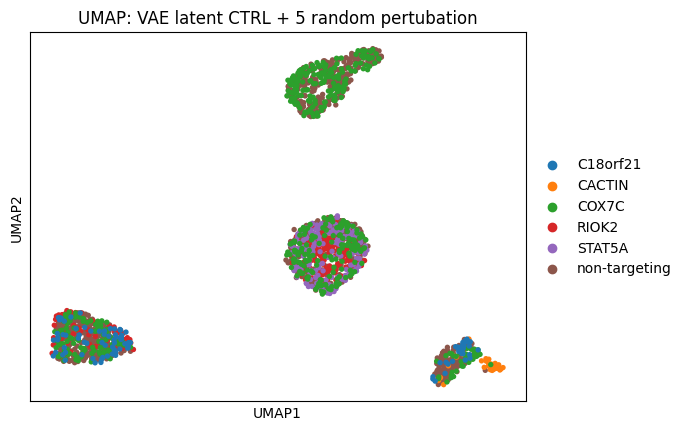

In [14]:
adata_sub
#把vae_latent做umap可视化
sc.pp.neighbors(adata_sub, n_neighbors=15, use_rep='VAE_latent')
sc.tl.umap(adata_sub, random_state=seed)
#绘图
plt.figure(figsize=(6,5))
sc.pl.umap(adata_sub, color=group_col, title="UMAP: VAE latent CTRL + 5 random pertubation", show=True)

In [13]:
case_data = adata[:,adata.var['highly_variable']].copy()

In [24]:
import torch

def mmd_loss(source, target, kernel_mul=2.0, kernel_num=5, fix_sigma=None):
    """
    计算源域数据和目标域数据之间的 MMD Loss (基于高斯核)。
    
    参数:
        source: 源域数据，形状为 (n, d)
        target: 目标域数据，形状为 (m, d)
        kernel_mul: 计算每个高斯核带宽时的乘数
        kernel_num: 高斯核的数量
        fix_sigma: 是否固定 sigma，如果为 None 则根据数据动态计算
    
    返回:
        loss: MMD loss 值
    """
    source, target = torch.tensor(source).to('cuda'), torch.tensor(target).to('cuda')
    n = source.size(0)
    m = target.size(0)
    
    # 拼接数据以统一计算核矩阵
    total = torch.cat([source, target], dim=0)
    total0 = total.unsqueeze(0).expand(int(total.size(0)), int(total.size(0)), int(total.size(1)))
    total1 = total.unsqueeze(1).expand(int(total.size(0)), int(total.size(0)), int(total.size(1)))
    
    # 计算 L2 距离矩阵
    L2_distance = ((total0 - total1) ** 2).sum(2)
    
    # 计算带宽 (bandwidth)
    if fix_sigma:
        bandwidth = fix_sigma
    else:
        bandwidth = torch.sum(L2_distance.data) / (n + m)**2
        
    bandwidth /= kernel_mul ** (kernel_num // 2)
    bandwidth_list = [bandwidth * (kernel_mul**i) for i in range(kernel_num)]
    
    # 计算多核高斯核矩阵
    kernel_val = [torch.exp(-L2_distance / bandwidth_temp) for bandwidth_temp in bandwidth_list]
    kernels = sum(kernel_val)
    
    # 根据 MMD 公式组合核矩阵部分
    XX = kernels[:n, :n]
    YY = kernels[n:, n:]
    XY = kernels[:n, n:]
    YX = kernels[n:, :n]
    
    loss = torch.mean(XX) + torch.mean(YY) - torch.mean(XY) - torch.mean(YX)
    return loss


In [25]:
autoencoder.eval()

# 2. 最好加上 no_grad 以节省显存和计算资源 (推断时的最佳实践)
with torch.no_grad():
    cell_data_embed = autoencoder(torch.tensor(case_data.X).cuda(), return_latent=False)
    cell_data_embed = cell_data_embed.cpu().detach().numpy()

In [27]:
case_data.X

array([[0.        , 0.64062476, 0.64062476, ..., 4.729229  , 2.9419792 ,
        1.8541076 ],
       [1.1030915 , 0.3697946 , 0.        , ..., 5.367972  , 3.7362523 ,
        2.3414388 ],
       [0.4065011 , 1.3886238 , 0.4065011 , ..., 5.218024  , 2.998682  ,
        0.4065011 ],
       ...,
       [0.        , 0.        , 0.        , ..., 3.798294  , 2.9923065 ,
        1.6322879 ],
       [0.        , 0.        , 0.        , ..., 3.856677  , 2.918954  ,
        0.81162524],
       [0.        , 0.4415948 , 0.        , ..., 3.897947  , 3.095444  ,
        1.4658245 ]], shape=(643413, 2000), dtype=float32)

In [26]:
cell_data_embed

array([[0.19127603, 0.35621923, 0.15544327, ..., 4.826433  , 3.335516  ,
        1.6200361 ],
       [0.9667257 , 0.35490847, 0.17292023, ..., 5.1878    , 3.704645  ,
        2.2600198 ],
       [0.48639542, 0.7759908 , 0.21091308, ..., 5.193051  , 3.3605368 ,
        0.2757862 ],
       ...,
       [0.6980937 , 0.19395286, 0.07996638, ..., 4.096856  , 2.9538102 ,
        1.5163214 ],
       [0.12546404, 0.20738292, 0.09148455, ..., 4.0861077 , 2.9052784 ,
        0.6459813 ],
       [0.42234024, 0.08857298, 0.07327066, ..., 4.138916  , 3.0118573 ,
        1.2208171 ]], shape=(643413, 2000), dtype=float32)

In [17]:
cell_data_embed.shape, case_data.X.shape

((643413, 2000), (643413, 2000))

In [ ]:
mmd_loss(cell_data_embed[-500:], case_data.X[-500:])

OutOfMemoryError: CUDA out of memory. Tried to allocate 19.07 GiB. GPU 0 has a total capacity of 31.74 GiB of which 9.40 GiB is free. Process 406320 has 390.00 MiB memory in use. Including non-PyTorch memory, this process has 21.96 GiB memory in use. Of the allocated memory 19.29 GiB is allocated by PyTorch, and 2.30 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)